In [34]:
#import pandas
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import re 
import nltk
from nltk.util import pr
stemmer=nltk.SnowballStemmer("english")
from nltk.corpus import stopwords
import string 
stopword=set(stopwords.words("english"))
df=pd.read_csv("C:/Users/admin/OneDrive/Desktop/data.csv")
df
df['labels']=df['class'].map({0:"Hate Speech Detected",1:"Offensive language detected",3:"No hate and offensive speech"})
print(df.head())
df=df[['tweet','labels']]
df.head()
def clean (text):
    text = str (text). lower()
    text = re. sub('[.?]', '', text)
    text = re. sub('https?://\S+|www.\S+', '', text)
    text = re. sub('<.?>+', '', text)
    text = re. sub('[%s]' % re. escape(string. punctuation), '', text)
    text = re. sub('\n', '', text)
    text = re. sub('\w\d\w', '', text)
    text = [word for word in text.split(' ') if word not in stopword]
    text=" ". join(text)
    text = [stemmer. stem(word) for word in text. split(' ')]
    text=" ". join(text)
    return text
df["tweet"]=df["tweet"].apply(clean)
df.dropna()
print(df.head())

   Unnamed: 0  count  hate_speech  offensive_language  neither  class  \
0           0      3            0                   0        3      2   
1           1      3            0                   3        0      1   
2           2      3            0                   3        0      1   
3           3      3            0                   2        1      1   
4           4      6            0                   6        0      1   

                                               tweet  \
0  !!! RT @mayasolovely: As a woman you shouldn't...   
1  !!!!! RT @mleew17: boy dats cold...tyga dwn ba...   
2  !!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...   
3  !!!!!!!!! RT @C_G_Anderson: @viva_based she lo...   
4  !!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...   

                        labels  
0                          NaN  
1  Offensive language detected  
2  Offensive language detected  
3  Offensive language detected  
4  Offensive language detected  
                          

In [35]:
df.dropna(inplace=True)
df.isna().sum()


tweet     0
labels    0
dtype: int64

In [36]:
x = np. array(df["tweet"])
y = np. array(df["labels"])
cv = CountVectorizer()
X = cv. fit_transform(x)
 

In [37]:
#Splitting the Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)


In [38]:
#Model building
clf = DecisionTreeClassifier()

#Training the model
clf.fit(X_train,y_train)

#print(y_train)

DecisionTreeClassifier()

In [39]:
#Predicting the outcome
inp = "You are too bad and I dont like your attitude"
inp = cv.transform([inp]).toarray()
print(clf.predict(inp))

['Offensive language detected']


In [40]:
y_pred=clf.predict(X_test)

In [41]:
#confusion matrix and accuracy
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
cm

array([[ 160,  270],
       [ 304, 6071]], dtype=int64)

In [42]:
import seaborn as sns 
import matplotlib.pyplot as ply
%matplotlib inline

<AxesSubplot:>

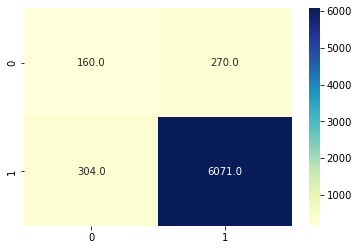

In [43]:
sns.heatmap(cm,annot=True,fmt=".1f",cmap="YlGnBu")

In [44]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9156502571638501

In [45]:
sample="lets units kill all the people who are protestinf against the governmnet"
sample=clean(sample)

In [46]:
sample

'let unit kill peopl protestinf governmnet'

In [47]:
data1=cv.transform({sample}).toarray()

In [48]:
data1

array([[0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [50]:
clf.predict(data1)

array(['Hate Speech Detected'], dtype=object)